## Provided Notebooks for embedding extraction and Structure prediction

Run these commands to install "fm" library

pip install rna-fm

cd ./RNA-FM

pip install .

In [9]:
import fm
import torch

if __name__=="__main__":
    path= r"C:\Users\nikhi\Desktop\RNA\RNA-FM\redevelop\pretrained\RNA-FM-ResNet_PDB-All.pth"
    model, alphabet = fm.downstream.build_rnafm_resnet(type="ss") #, model_location=path)
    batch_converter = alphabet.get_batch_converter()
    model.eval()  # disables dropout for deterministic results

    # Prepare data
    data = [
        ("RNA1", "GGGUGCGAUCAUACCAGCACUAAUGCCCUCCUGGGAAGUCCUCGUGUUGCACCCCU"),
    ]
    batch_labels, batch_strs, batch_tokens = batch_converter(data)

    input = {
        "description": batch_labels,
        "token": batch_tokens
    }

    # Secodnary Structure Prediction (on CPU)
    with torch.no_grad():
        results = model(input)
    ss_prob_map = results["r-ss"]
    print(ss_prob_map)
    print(ss_prob_map.shape)


tensor([[[ -2.2738, -10.7725, -13.2753,  ...,   4.6036,  -3.8938,  -5.8260],
         [-10.7725,  -7.1750, -16.5713,  ...,  -4.4346, -11.5781,  -9.9998],
         [-13.2753, -16.5713,  -8.7082,  ..., -11.8188, -13.1216, -11.6672],
         ...,
         [  4.6036,  -4.4346, -11.8188,  ..., -10.7703, -15.1376, -13.7806],
         [ -3.8938, -11.5781, -13.1216,  ..., -15.1376, -11.6447, -14.9832],
         [ -5.8260,  -9.9998, -11.6672,  ..., -13.7806, -14.9832,  -5.5334]]])
torch.Size([1, 56, 56])


In [10]:
import torch
import fm

# Load RNA-FM model
model, alphabet = fm.pretrained.rna_fm_t12()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# Prepare data
data = [
    ("RNA1", "GGGUGCGAUCAUACCAGCACUAAUGCCCUCCUGGGAAGUCCUCGUGUUGCACCCCU"),
    ("RNA2", "GGGUGUCGCUCAGUUGGUAGAGUGCUUGCCUGGCAUGCAAGAAACCUUGGUUCAAUCCCCAGCACUGCA"),
    ("RNA3", "CGAUUCNCGUUCCC--CCGCCUCCA"),
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

# Extract embeddings (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[12])
token_embeddings = results["representations"][12]

# Print token-level embeddings and predictions
for i, (label, sequence) in enumerate(data):
    print(f"\nSequence: {label}")
    print(f"RNA Sequence: {sequence}")
    print("Token embeddings shape:", token_embeddings[i].shape)
    print("Token embeddings:", token_embeddings[i])  # Prints the embeddings for each token


Sequence: RNA1
RNA Sequence: GGGUGCGAUCAUACCAGCACUAAUGCCCUCCUGGGAAGUCCUCGUGUUGCACCCCU
Token embeddings shape: torch.Size([71, 640])
Token embeddings: tensor([[-0.1326,  0.1063,  0.0631,  ...,  0.0964, -0.2054,  0.0271],
        [ 0.0998, -0.4092,  0.1103,  ..., -0.4704, -0.0205, -0.2949],
        [ 0.2168, -0.1919, -0.0448,  ..., -0.4306, -0.0160, -0.3249],
        ...,
        [-0.1390,  0.1097, -0.1074,  ..., -0.1592,  0.1676,  0.1030],
        [-0.1390,  0.1097, -0.1074,  ..., -0.1592,  0.1676,  0.1030],
        [-0.1390,  0.1097, -0.1074,  ..., -0.1592,  0.1676,  0.1030]])

Sequence: RNA2
RNA Sequence: GGGUGUCGCUCAGUUGGUAGAGUGCUUGCCUGGCAUGCAAGAAACCUUGGUUCAAUCCCCAGCACUGCA
Token embeddings shape: torch.Size([71, 640])
Token embeddings: tensor([[-0.1842, -0.0591, -0.1665,  ..., -0.0380, -0.0621,  0.1512],
        [ 0.0615, -0.6390,  0.0834,  ..., -0.5313,  0.2606, -0.3980],
        [ 0.1390, -0.4602,  0.0823,  ..., -0.6763,  0.1559, -0.5889],
        ...,
        [-0.2537, -0.1714,  

## Prediction using Inference file

Make sure the current working directory is "../RNA/RNA-FM/redevelop". 
The inference code remains unchanged, except for the removal of GPU-related options.

In [1]:
import os

current_directory = os.getcwd()
print(current_directory)

C:\Users\nikhi\Desktop\RNA\RNA-FM\redevelop


### Embedding extraction

In [1]:
%run launch/predict.py --config="pretrained/extract_embedding.yml" --data_path="./data/examples/example.fasta" --save_dir="./resuts" --save_frequency 1 --save_embeddings

work_dir:C:\Users\nikhi\Desktop\RNA\RNA-FM\redevelop
2025-02-06 18:45:30,150 prediction INFO: Using CPU
2025-02-06 18:45:30,150 prediction INFO: Loaded configuration file pretrained/extract_embedding.yml
2025-02-06 18:45:30,166 prediction INFO: Model File:none
2025-02-06 18:45:30,166 prediction INFO: Batch Size:1
2025-02-06 18:45:30,170 prediction INFO: Threshold:0.5
2025-02-06 18:45:30,171 prediction INFO: Prediction Dataset: ./data/examples/example.fasta


C:\Users\nikhi\anaconda3\envs\RNA\lib\site-packages\ignite\handlers\checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer


Sequence Num: 3
2025-02-06 18:45:32,361 prediction.inference INFO: Enter inferencing for Custom set
Iteration[1/3]
saved embedding shape: (96, 640)
Iteration[2/3]
saved embedding shape: (72, 640)
Iteration[3/3]
saved embedding shape: (45, 640)
2025-02-06 18:45:32,852 prediction.inference INFO: Finish Prediction


### Structure prediction

In [2]:
%run launch/predict.py --config="pretrained/ss_prediction.yml" --data_path="./data/examples/example.fasta" --save_dir="./resuts" --save_frequency 1

work_dir:C:\Users\nikhi\Desktop\RNA\RNA-FM\redevelop
2025-02-06 18:40:38,257 prediction INFO: Using CPU
2025-02-06 18:40:38,257 prediction INFO: Loaded configuration file pretrained/ss_prediction.yml
2025-02-06 18:40:38,257 prediction INFO: Model File:pretrained/RNA-FM-ResNet_PDB-All.pth
2025-02-06 18:40:38,257 prediction INFO: Batch Size:1
2025-02-06 18:40:38,265 prediction INFO: Threshold:0.33993712
2025-02-06 18:40:38,265 prediction INFO: Prediction Dataset: ./data/examples/example.fasta


C:\Users\nikhi\anaconda3\envs\RNA\lib\site-packages\ignite\handlers\checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
C:\Users\nikhi\Desktop\RNA\RNA-FM\redevelop\model\baseline.py:251: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly all

Complete Load Weight
Sequence Num: 3
2025-02-06 18:40:43,080 prediction.inference INFO: Enter inferencing for Custom set
Iteration[1/3]
Iteration[2/3]
Iteration[3/3]
2025-02-06 18:40:44,156 prediction.inference INFO: Finish Prediction


## Visualize the structure

Visualize the results stored in "..\RNA\RNA-FM\redevelop\results\pred_ct" 

Header: 45	1p6v_B


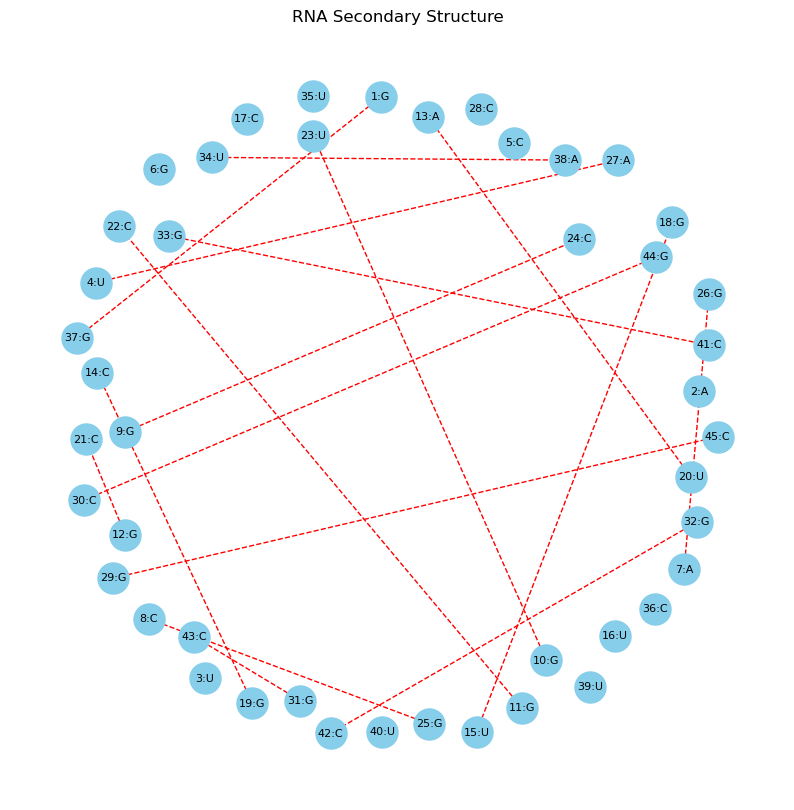

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

# Load the .ct file
def parse_ct_file(filepath):
    with open(filepath, 'r') as file:
        # Skip the header line
        header = file.readline().strip()
        structure_data = []
        
        # Parse each line in the .ct file
        for line in file:
            fields = line.strip().split()
            if len(fields) == 6:
                index = int(fields[0])
                nucleotide = fields[1]
                paired_index = int(fields[4])
                structure_data.append((index, nucleotide, paired_index))
                
    return structure_data, header

# Visualize the RNA secondary structure
def plot_rna_secondary_structure(structure_data, title="RNA Secondary Structure"):
    G = nx.Graph()
    paired_edges = []
    
    # Add nodes and edges
    for index, nucleotide, paired_index in structure_data:
        G.add_node(index, label=nucleotide)
        
        # Add base pairing edges
        if paired_index > index:
            paired_edges.append((index, paired_index))
            
    # Draw the graph
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 10))
    
    # Draw nodes with nucleotide labels
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, labels={i: f"{i}:{n}" for i, n, _ in structure_data}, font_size=8)
    
    # Draw the pairing edges
    nx.draw_networkx_edges(G, pos, edgelist=paired_edges, edge_color='red', style='dashed')
    
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
structure_data, header = parse_ct_file(r"C:\Users\nikhi\Desktop\RNA\RNA-FM\redevelop\results\pred_ct\1p6v_B.ct")
print(f"Header: {header}")
plot_rna_secondary_structure(structure_data, title="RNA Secondary Structure")
